In [1]:
# import libraries

import os
import random

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("res")

In [3]:
# load dataset
df = pd.read_csv('kidney_disease.csv')
df.drop(columns=['id'],axis=1,inplace=True)

In [4]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.columns = ['age', 'blood_pressure', 'spesific_gravity', 'albumin', 'sugar',
              'red_blood_cell', 'puss_cell', 'puss_cell_clumbs', 'bacteria', 
              'blood_glucose_random', 'blood_urea','serum_creatine', 'sodium',
              'potassium', 'hemoglobin', 'packet_cell_volume', 'white_blood_cell_count',
              'red_blood_cell_count', 'hyper_tension', 'diabetes_mellitus',
              'coronary_artert_disease','appetite', 'peda_edema', 'anemia', 'class']

In [6]:
df.head()

,age,blood_pressure,spesific_gravity,albumin,sugar,red_blood_cell,puss_cell,puss_cell_clumbs,bacteria,blood_glucose_random,...,packet_cell_volume,white_blood_cell_count,red_blood_cell_count,hyper_tension,diabetes_mellitus,coronary_artert_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   spesific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cell           248 non-null    object 
 6   puss_cell                335 non-null    object 
 7   puss_cell_clumbs         396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatine           383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [8]:
def convert2numeric(col):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # coerce : if can't convert, value to nan

to_numeric_list = ['packet_cell_volume','white_blood_cell_count','red_blood_cell_count']

for col in to_numeric_list:
    convert2numeric(col)

In [9]:
# EDA : KDE
cat_columns = [col for col in df.columns if df[col].dtype == 'object']
num_columns = [col for col in df.columns if df[col].dtype != 'object']

for col in cat_columns:
    print(f"{col} : {df[col].unique()}")
    
"""
diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artert_disease : ['no' 'yes' '\tno' nan]
class : ['ckd' 'ckd\t' 'notckd']
"""    

clean_dict = {' yes' : 'yes',
                 '\tno' : 'no',
                 '\tyes' : 'yes',
                 'ckd\t' : 'ckd' }

def normalize_data(col):
    df[col].replace(clean_dict,inplace=True) 

normalize_data('class')    
normalize_data('diabetes_mellitus')
normalize_data('coronary_artert_disease')


red_blood_cell : [nan 'normal' 'abnormal']
puss_cell : ['normal' 'abnormal' nan]
puss_cell_clumbs : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hyper_tension : ['yes' 'no' nan]
diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artert_disease : ['no' 'yes' '\tno' nan]
appetite : ['good' 'poor' nan]
peda_edema : ['no' 'yes' nan]
anemia : ['no' 'yes' nan]
class : ['ckd' 'ckd\t' 'notckd']


In [10]:
df['class']

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object

In [11]:
# mapping
df['class'] = df['class'].map({'notckd' : 0, 'ckd' : 1})
df


,age,blood_pressure,spesific_gravity,albumin,sugar,red_blood_cell,puss_cell,puss_cell_clumbs,bacteria,blood_glucose_random,...,packet_cell_volume,white_blood_cell_count,red_blood_cell_count,hyper_tension,diabetes_mellitus,coronary_artert_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,0


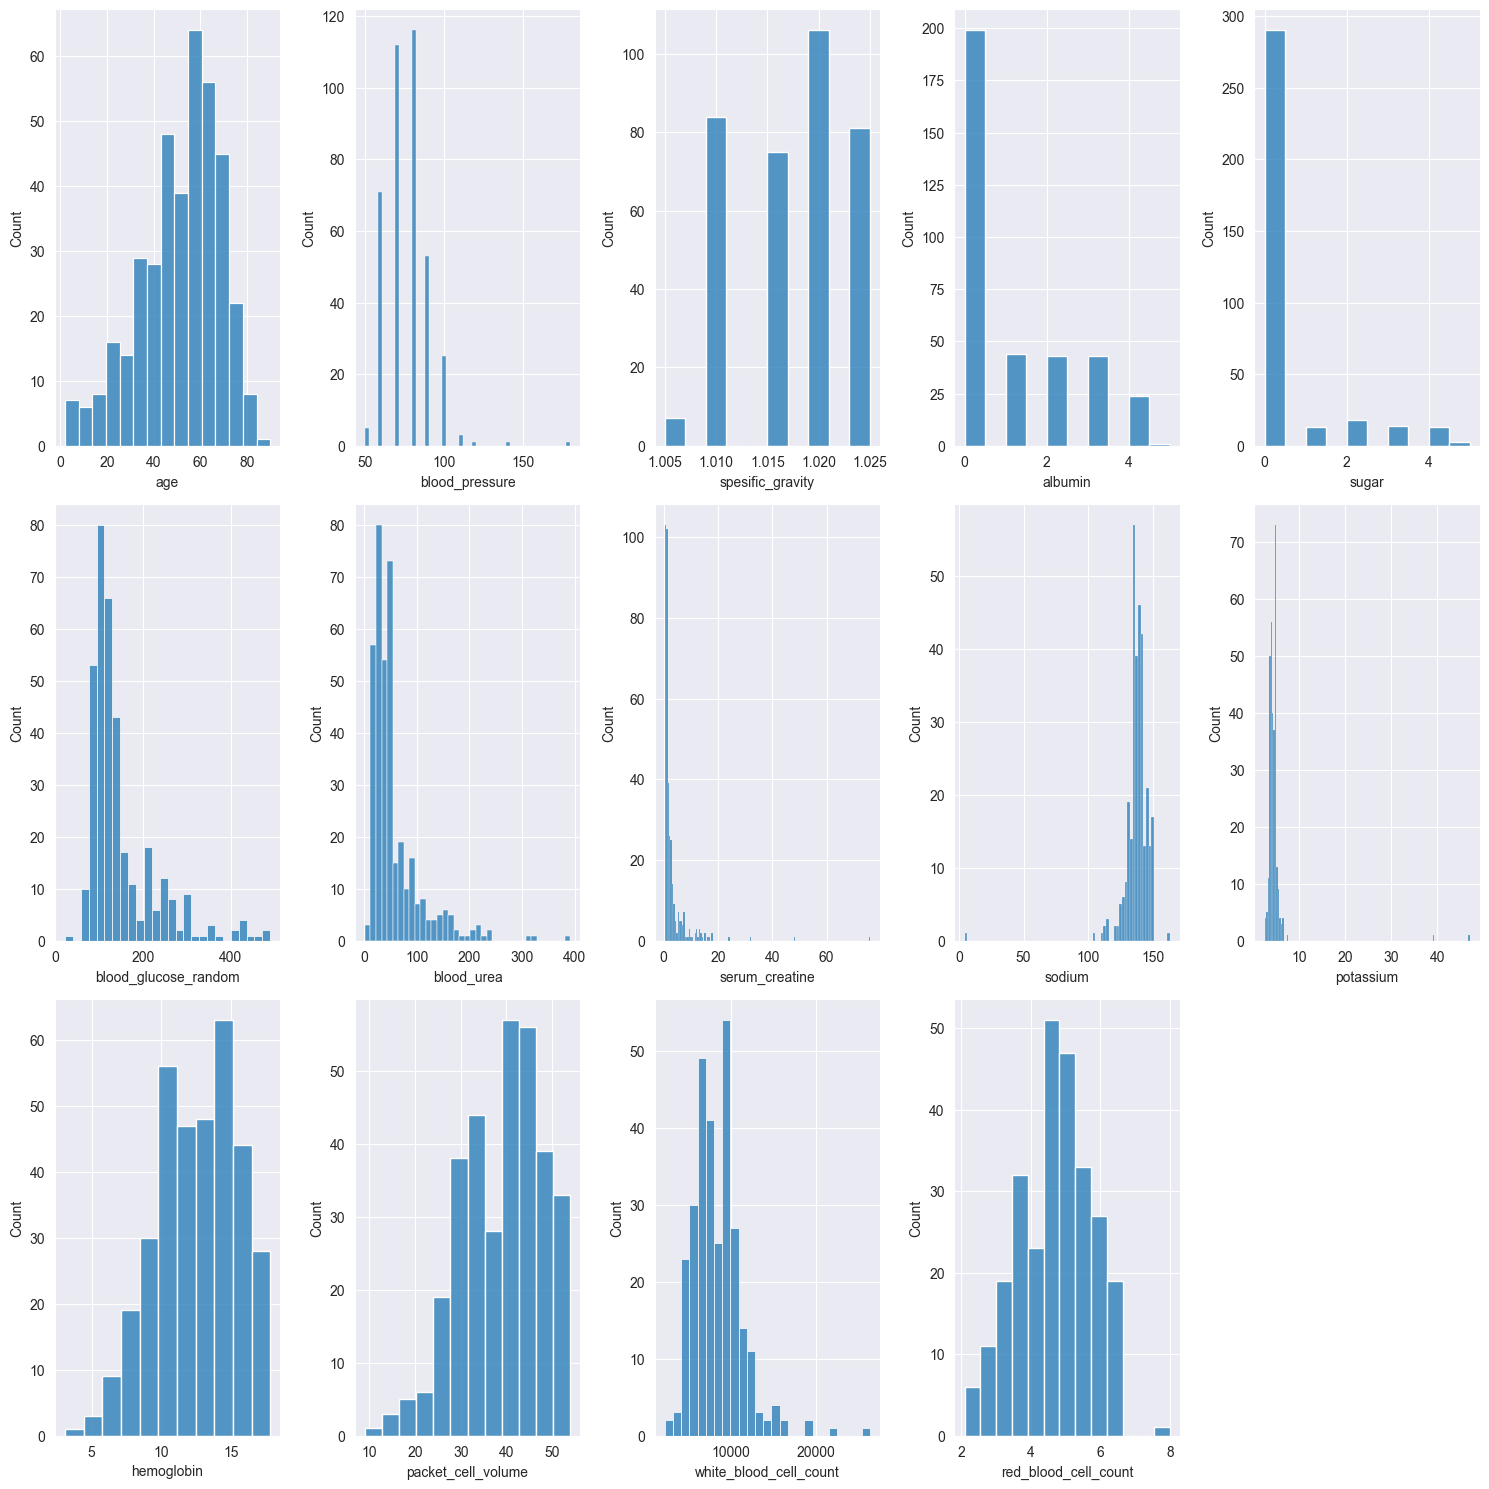

In [12]:
plt.figure(figsize=(15,15))
num_plot = 1

for col in num_columns:
    if num_plot <= len(num_columns):
        ax = plt.subplot(3,5,num_plot)
        sns.histplot(df[col])
        plt.xlabel(col)
        
        num_plot += 1
plt.tight_layout()
plt.show()
    

In [13]:
df['class']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

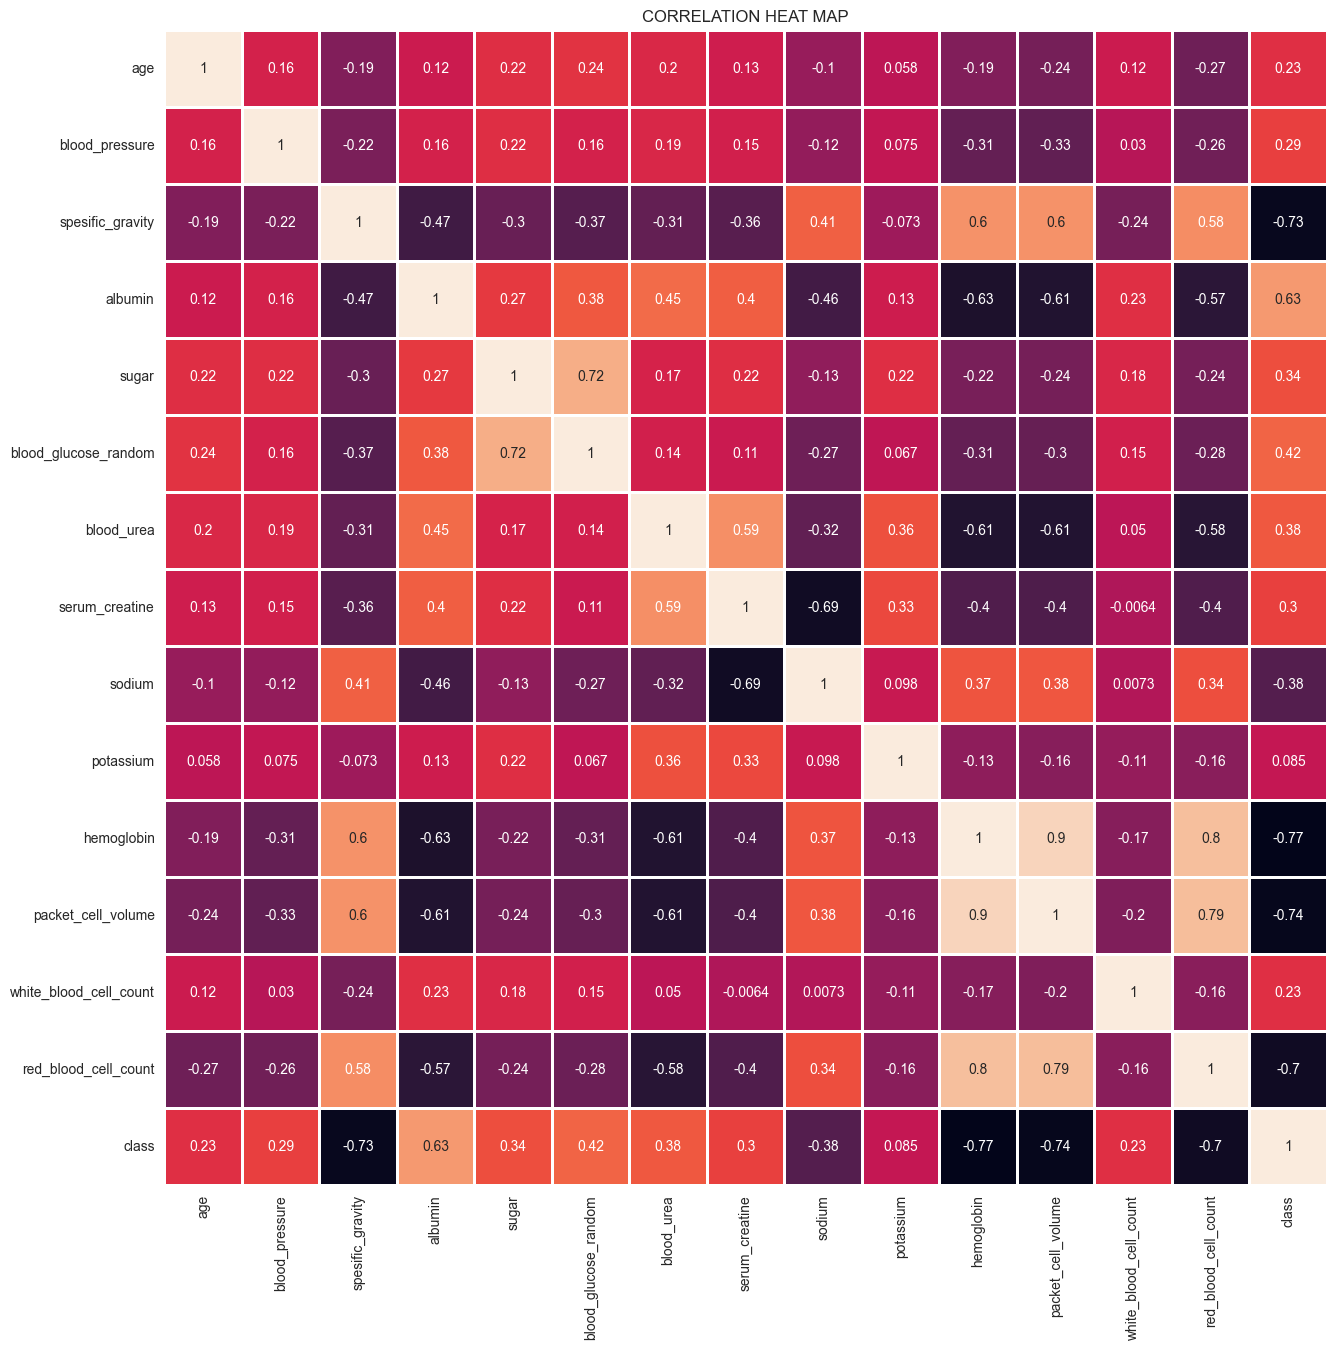

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, linewidths=2, linecolor='white', cbar=False)
plt.title("CORRELATION HEAT MAP")
plt.show()
# hemoglobin = 0.77 
# packet cell volume = 0.74
# spesific gravity = 0.73
# red blood cell count = 0.7
# albumin = -0.63


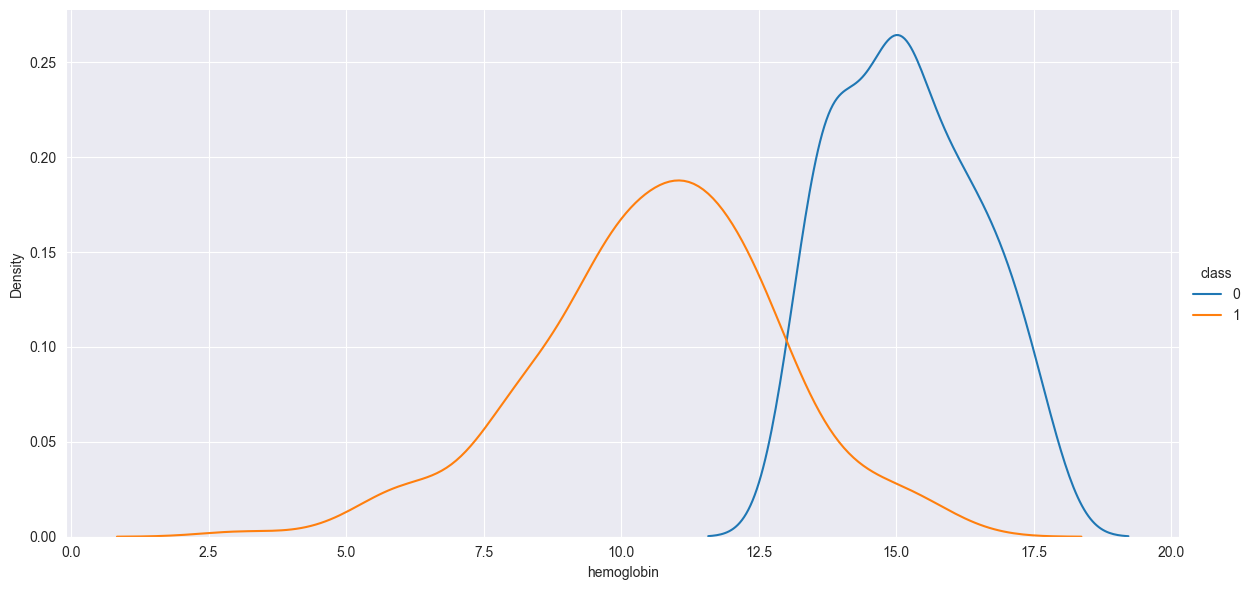

In [15]:
def draw_kde(col): # kernel density estimation
    grid = sns.FacetGrid(df, hue='class', height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

draw_kde('hemoglobin')    

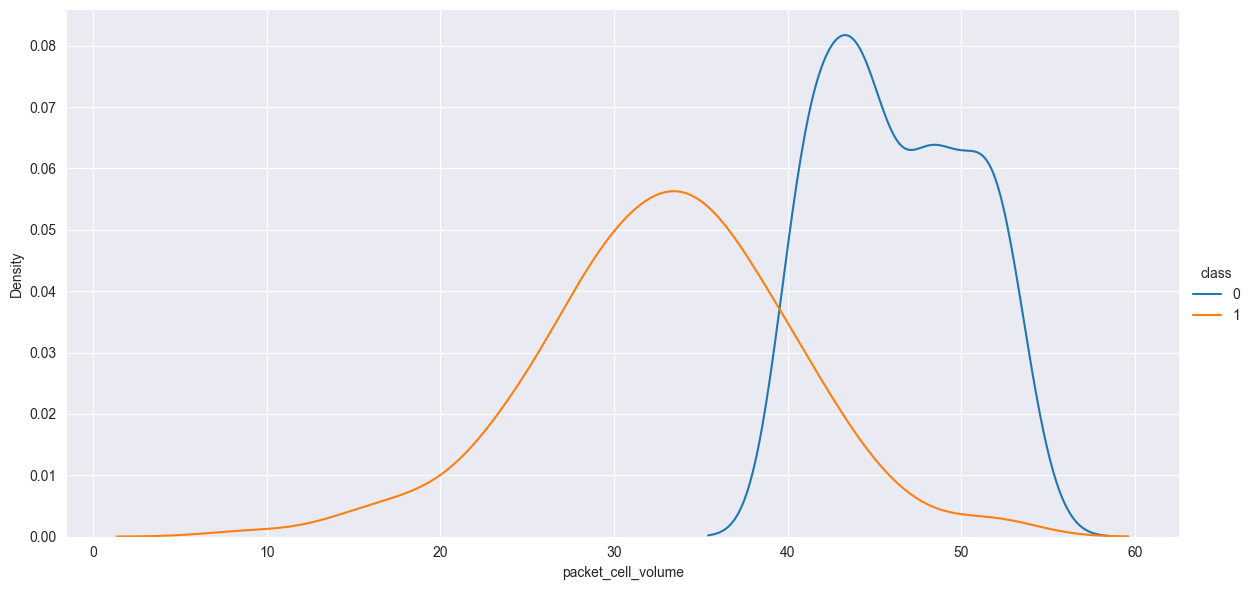

In [16]:
draw_kde('packet_cell_volume')

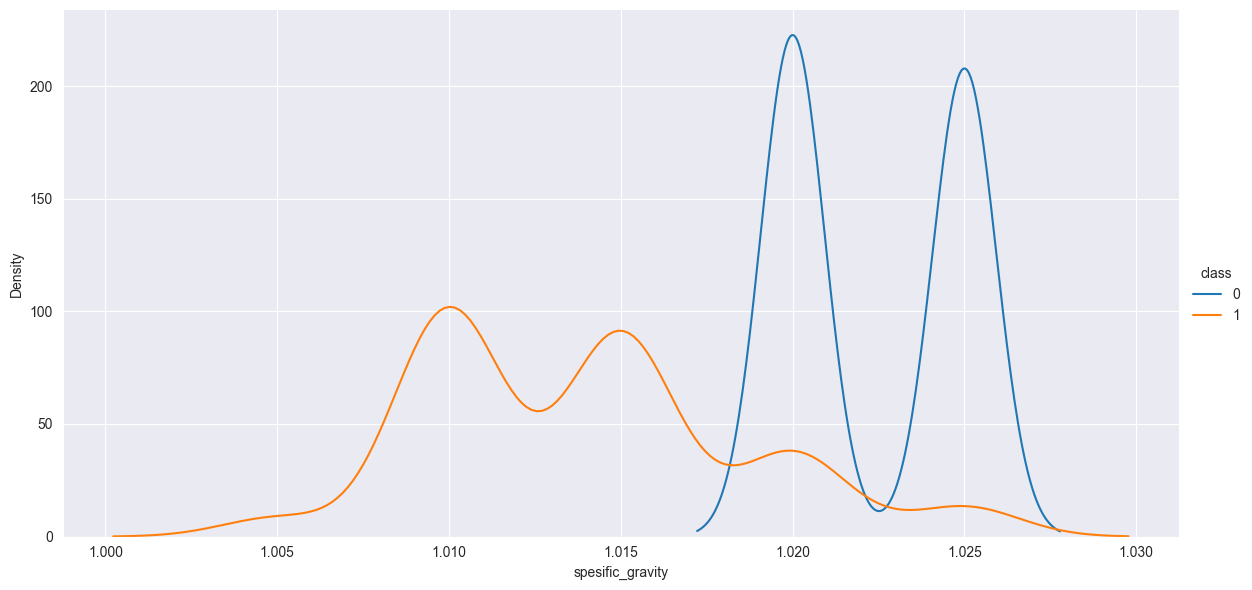

In [17]:
draw_kde('spesific_gravity')

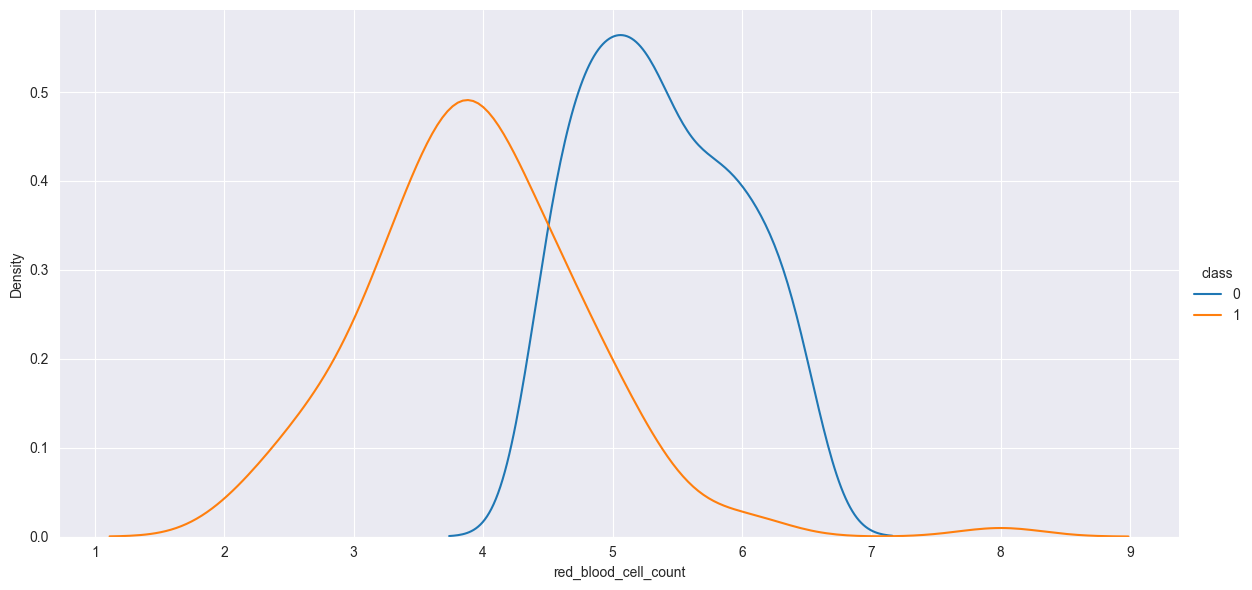

In [18]:
draw_kde('red_blood_cell_count')

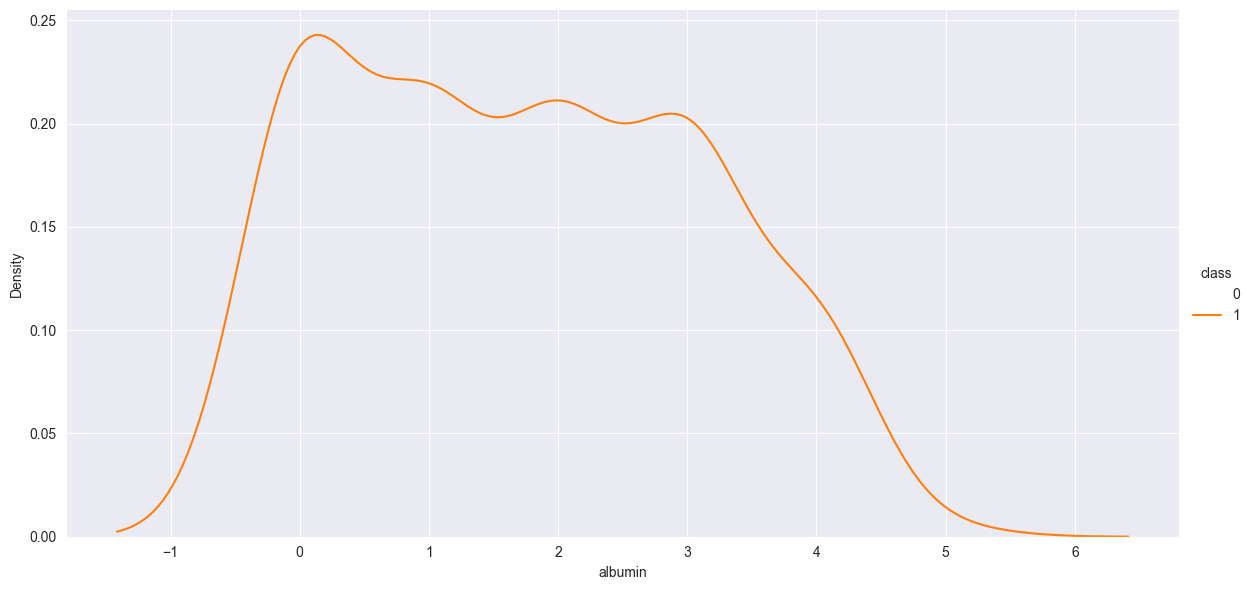

In [19]:
draw_kde('albumin') # too many nan value

In [20]:
# preprocessing : missing value problem
df.isna().sum().sort_values(ascending=False)

red_blood_cell             152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packet_cell_volume          71
puss_cell                   65
hemoglobin                  52
sugar                       49
spesific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatine              17
blood_pressure              12
age                          9
bacteria                     4
puss_cell_clumbs             4
hyper_tension                2
diabetes_mellitus            2
coronary_artert_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [21]:
"""def solve_mvp_with_random_value(col): 
    not_null_list = [val for val in df[col] if val > -1]
    
    for i,val in enumerate(df[col]):
        if not val > -1:
            rand_idx = random.randint(0, len(not_null_list) - 1)
            df[col][i] = not_null_list[rand_idx]"""

def solve_mvp_with_random_value(col): # for numeric columns
    random_sample = df[col].dropna().sample(df[col].isna().sum())
    random_sample.index = df[df[col].isna()].index
    df.loc[df[col].isna(), col] = random_sample


In [22]:
for col in num_columns:
    solve_mvp_with_random_value(col)
df[num_columns].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
spesific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatine            0
sodium                    0
potassium                 0
hemoglobin                0
packet_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [23]:
df[cat_columns].isna().sum().sort_values(ascending=False)

red_blood_cell             152
puss_cell                   65
puss_cell_clumbs             4
bacteria                     4
hyper_tension                2
diabetes_mellitus            2
coronary_artert_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [24]:
def solve_mvp_with_mode(col): # for categorical columns
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode) 

In [25]:
for col in cat_columns:
    solve_mvp_with_mode(col)

In [26]:
df.isna().sum()

age                        0
blood_pressure             0
spesific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
puss_cell                  0
puss_cell_clumbs           0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatine             0
sodium                     0
potassium                  0
hemoglobin                 0
packet_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hyper_tension              0
diabetes_mellitus          0
coronary_artert_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

In [27]:
# preprocessing: feature encoding
for col in cat_columns:
    print(f"{col} : {df[col].nunique()}")

red_blood_cell : 2
puss_cell : 2
puss_cell_clumbs : 2
bacteria : 2
hyper_tension : 2
diabetes_mellitus : 2
coronary_artert_disease : 2
appetite : 2
peda_edema : 2
anemia : 2
class : 2


In [28]:
encoder = LabelEncoder()
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

In [29]:
# model (dt) training and testing
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
dt = DecisionTreeClassifier(max_depth=15,random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)

In [31]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [32]:
print("accuracy:", dt_acc)
print('-'*70)
print("confusion matrix : ",cm)
print('-'*70)
print("classification report : ",cr)


accuracy: 0.9916666666666667
----------------------------------------------------------------------
confusion matrix :  [[43  1]
 [ 0 76]]
----------------------------------------------------------------------
classification report :                precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.99      1.00      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



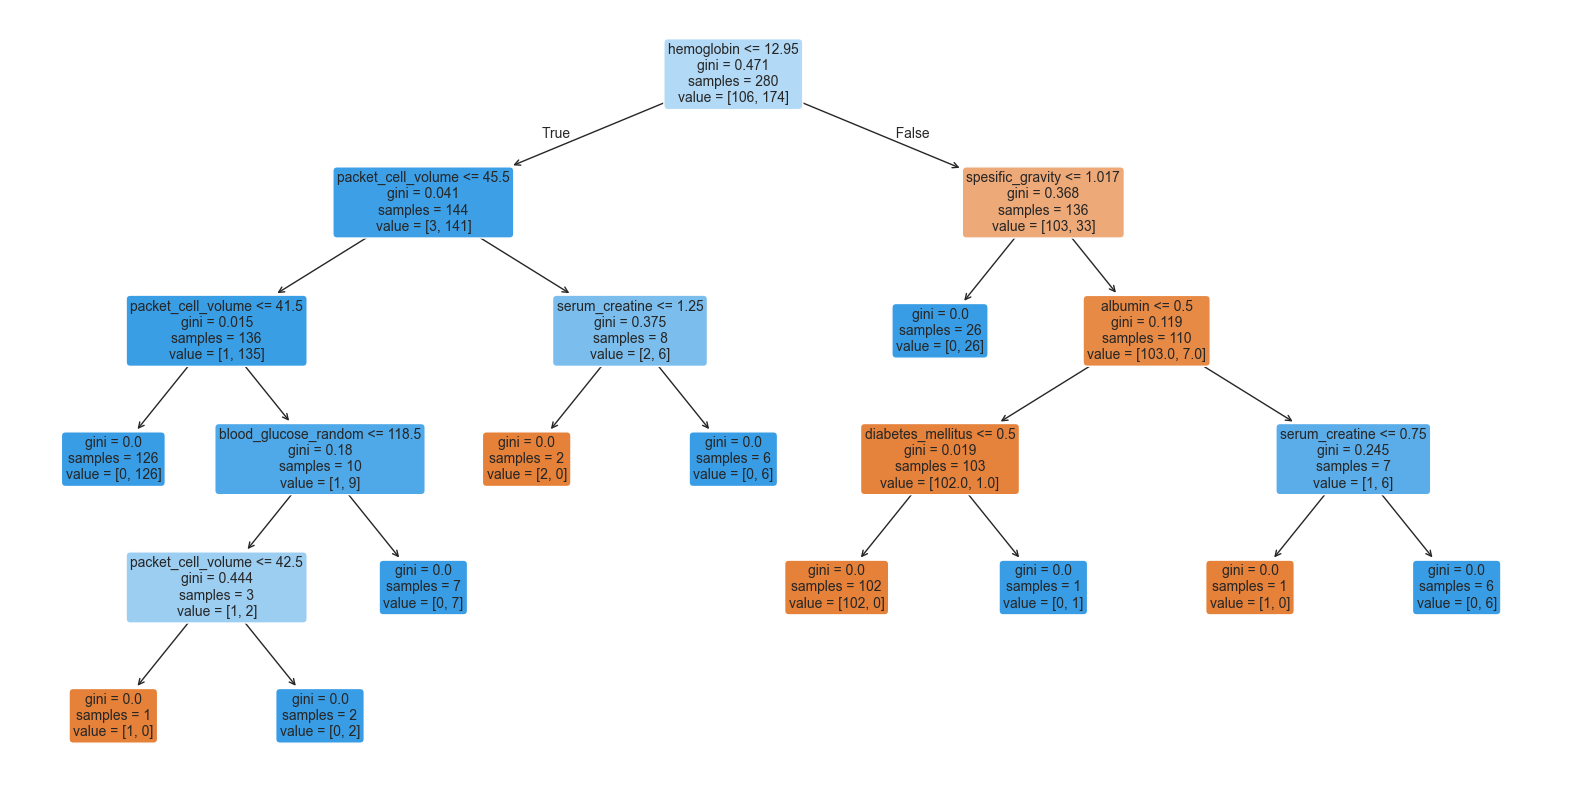

In [33]:
# dt visualization - feature importance
class_names = ['ckd','notckd']
independent_col = [col for col in df.columns if col != 'class']

plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=independent_col, filled=True, rounded=True, fontsize=10)
plt.show()

In [34]:
feature_importance = pd.DataFrame({'Feature':independent_col,'Importance': dt.feature_importances_})
feature_importance

,Feature,Importance
0,age,0.000000
1,blood_pressure,0.000000
2,spesific_gravity,0.279910
3,albumin,0.071459
4,sugar,0.000000
5,red_blood_cell,0.000000
6,puss_cell,0.000000
7,puss_cell_clumbs,0.000000
8,bacteria,0.000000
9,blood_glucose_random,0.003542


In [35]:
print("most important feaute : ",feature_importance.sort_values('Importance', ascending=False).iloc[0])

most important feaute :  Feature       hemoglobin
Importance       0.57599
Name: 14, dtype: object


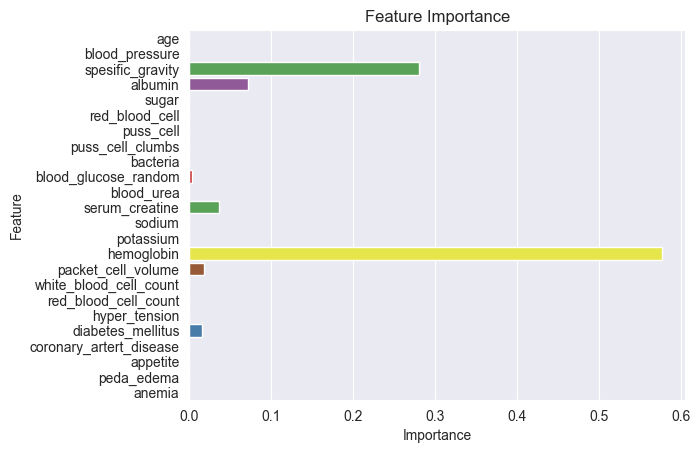

In [36]:
plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Set1')
plt.title("Feature Importance")
plt.show()